# Sequence analysis

## Problem

In the folder "Sequences" there are text files with the sequences of some introns. 

Find the length of each intron (i.e. the number of bases it contains) and use these lengths to find the following summary statistics taken across all 50 introns. 

1. mean length;
2. minimum length; 
3. maximum length; 
4. (sample) standard deviation of the lengths.

## Breaking down the problem/ planning the code

We first need to read all of the text files and store their contents to memory. To help reading the text files, we should write code that can generate the names automatically.

For each intron, we need to measure the lengths, and then from a list of the lengths calculate the different properties.

The average of this list is the sum divided by the length- we can calculate both from the list using the builtin sum and len functions.

We should use the built in min and max functions to calculate the min and max. As an illustration however we have calcuated this manually. We start off assuming that the first item is the smallest, then run a for loop to compare each item in the list to this value. If the item is smaller, we replace smallest with the new smallest value. We do something similar for max.

Finally, to calculate the standard deviation we use the formula

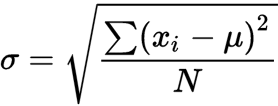

We use a list comprehension to build a new list of x-mu from the data. We sum that, divide by the list length, then take the square root.

In [4]:
def readIntronLength(name):
    with open(name,"r") as inp:
        intron = inp.readline()
    return len(intron)

def fileName(number):
    return ("Sequences/%02d.txt" % number)

#Find the lengths of all the sequences
intronLengths = [readIntronLength(fileName(n+1)) for n in range(50)]

average = sum(intronLengths)/len(intronLengths)
print("average:",average)

smallest = intronLengths[0]
for item in intronLengths:
    if item < smallest:
        smallest=item
print("min:",smallest)

biggest = intronLengths[0]
for item in intronLengths:
    if item > biggest:
        biggest=item
print("max:",biggest)

standardDev = (sum([(item-average)**2 for item in intronLengths])/len(intronLengths))**0.5
print("sd:",standardDev)

average: 69.36
min: 37
max: 100
sd: 19.208081632479594


## Exercises

1. Find the total number of A, C, G and T nucleotides across the 50 introns.
2. Calculate the base frequency at each position for the first 10 bases of the introns (note the expected answer here is a 4 x 10 matrix, with a row corresponding to each of the bases A, C, G and T, and columns corresponding to each base position).

```The code below regenerates the input data```

In [3]:
# Generate our data
import random

nuc = {
    0: "A",
    1: "C",
    2: "T",
    3: "G"
}

for i in range(50):
    name = "%02d.txt" % (i+1)
    length = random.randint(37,101)
    sequence=""
    for i in range(length):
        base = random.randint(0,3)
        sequence += (nuc[base])
    print(name,length,sequence)
    with open("sequences/"+name,"w") as oup:
        oup.write(sequence)
    

01.txt 62 GTTTTGAGCGGGTTAGGTAAATGAGGTCCTTGCTCATATTATAGGGTAGATCCGGATACCAA
02.txt 97 CGCTGCTCTGTGCTTGGTCGCTCATTTCCTATGCTCACCTATTCAGATTGACGGGCAAGCGTCATTTTTCATTGATGAGGCAAGGTGGTAGTCAAGT
03.txt 80 CTAACTTGGGGAGATTCATTCGCTCACTCTTCTATACTTTGGATGTTCGGGCGCCGAGATAACCTACCAAAGTACGTGTG
04.txt 90 GCCATTCGACATAAACGGTACTCGAACTGCGAGAAGAATTGGCTTACCGCGGCGGCTATAATGCCTCCATTCTCGAAATCGGAGATTTCC
05.txt 80 CCTTAATGAGCCAGTGAAGTTAGCCCAACGGATGGGCCTTTGAGTGTACAAAGTCTACCAACACGGCGTCGACCGAGTGC
06.txt 37 TGGAGCCGCCGACTCGCGATCAGTATGATTCACTGAA
07.txt 50 CCCTGTTCATTACTATTGCAGCTGTCGTCGCAAATTGTGCTCTTGGGTGG
08.txt 60 CCAGTACGACGGTCCCCTATGTGATCAAAGTGGTGTCTAAAGTGCACAAAATGTCGCCCT
09.txt 87 GAGCCCGGTCTCTCAGTTTGTAAACCGATTAGGCCTTACTTATCAAGGGAACGGGCGAGTTAACGGCAGACCTTGCGCATACGACCG
10.txt 75 CGAGAGTGCTAACAGTACTCGGACAGCCAAATTGTAGCGCGCGTGGCCTAAATTAACCTGTGCGGTAAACAATTC
11.txt 61 CTTGTCCACTCTATCGCCATGCAGGTTTTACGCTAAGGCTCAACTGGACAGACGATTGTGT
12.txt 46 GTCGGAATGTTTAAAAGTATTCGTGATCGTAAACATCTTTATGGCA
13.txt 98 AGTGTTTTCCTCGATCAACTCTTCGGGGCTCGT